In [166]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Files to Load
sneaker_data_to_load = Path("SNKR_DataProject.csv")
region_data_to_load = Path("States_By_Region.csv")

# Read sneaker data and store into Pandas DataFrames
sneaker_data = pd.read_csv(sneaker_data_to_load)
region_data = pd.read_csv(region_data_to_load)


In [167]:
#Combine sneaker data and region data


In [168]:
#Remove dollar signs and commas in Sale Price column

def convert_price(price):
    if pd.notnull(price) and isinstance(price, str):
        return pd.to_numeric(price.replace(',', '').replace('$', ''))
    else:
        return price

sneaker_data['Sale Price'] = sneaker_data['Sale Price'].apply(convert_price)

In [169]:
# Remove dollar signs in Retail Price column
sneaker_data['Retail Price'] = pd.to_numeric(sneaker_data['Retail Price'].str.replace('$', ''))

## This represents the entire dataset. 

In [170]:
# View data set
sneaker_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/2017,11.0,Rhode Island


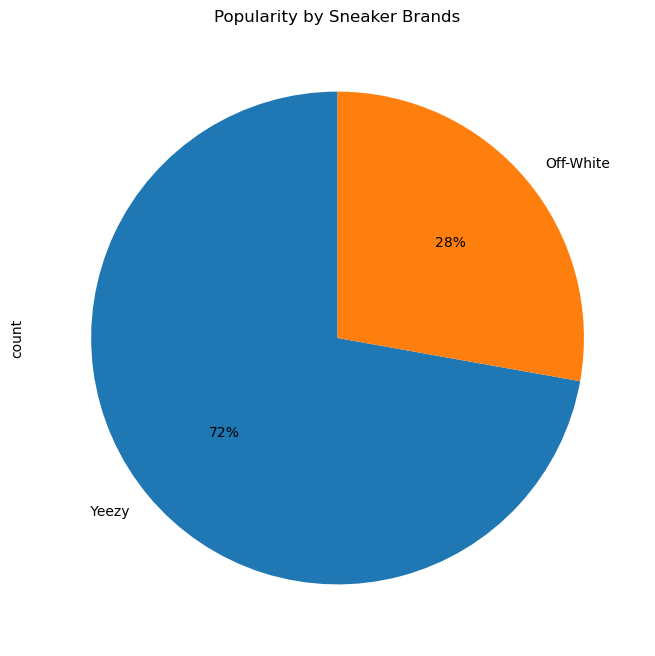

In [171]:
# Create a pie chart
plt.figure(figsize=(8,8))
sneaker_data ['Brand'].value_counts().plot(kind='pie',startangle=90, autopct='%1.0f%%')
plt.title('Popularity by Sneaker Brands')
plt.show()

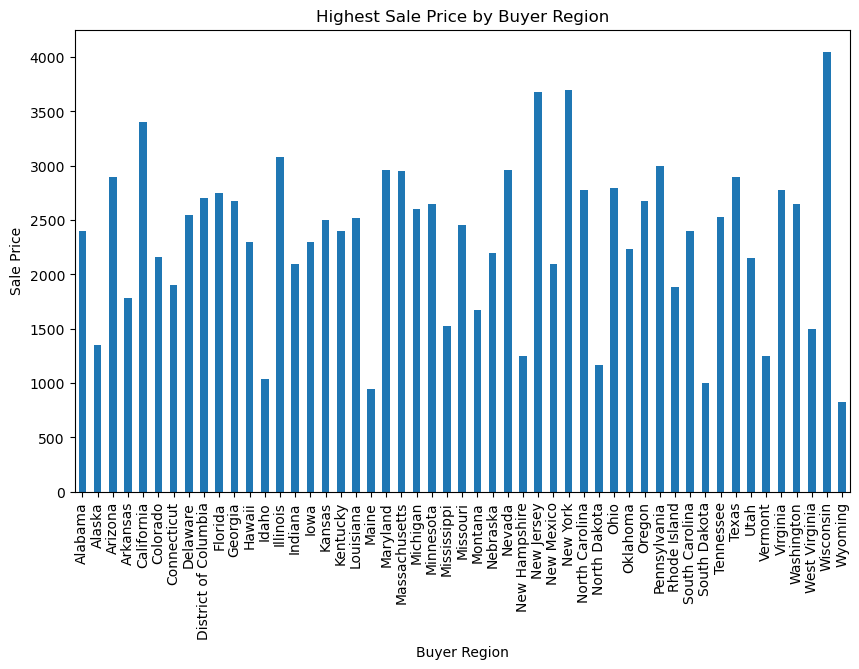

In [172]:
#Highest cost per region
sneaker_data['Sale Price'] = pd.to_numeric(sneaker_data['Sale Price'], errors='coerce')

# Group by region and maximum sales price
grouped = sneaker_data.groupby('Buyer Region')['Sale Price'].max()
plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.title('Highest Sale Price by Buyer Region')
plt.ylabel('Sale Price')
plt.xlabel('Buyer Region')
plt.show()

In [173]:
# Sort the sneakers
sneaker_roi = (sneaker_data['Sale Price'] - sneaker_data['Retail Price']) / sneaker_data['Retail Price']

print(sneaker_roi)

0        3.986364
1        2.113636
2        2.136364
3        3.886364
4        2.763636
           ...   
99951    1.568182
99952    1.718182
99953    1.750000
99954    1.954545
99955    1.909091
Length: 99956, dtype: float64
